In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Balancing using NEARMISS

In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# Define file paths
output_file_path = "/content/drive/MyDrive/CAPSTONE/balanced_MC2_nearmiss.csv"

# Load MC2 dataset
from scipy.io import arff
MC2_data = arff.loadarff('/content/drive/MyDrive/CAPSTONE/MC2.arff')
MC2_data = pd.DataFrame(MC2_data[0])

# Preprocess data
X = MC2_data.drop(columns=["Defective"])
y = MC2_data["Defective"]

# Handle missing values
X.replace('?', np.nan, inplace=True)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert categorical labels to binary labels
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Display class distribution before balancing
print("Class distribution before balancing:", Counter(y))

# Apply NearMiss algorithm
nearmiss = NearMiss()
X_resampled, y_resampled = nearmiss.fit_resample(X_imputed, y_binary)

# Convert binary labels back to original categorical labels
y_resampled_labels = label_encoder.inverse_transform(y_resampled)

# Display class distribution after balancing
print("Class distribution after balancing:", Counter(y_resampled_labels))

# Save balanced dataset to a new file
balanced_MC2 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled_labels, columns=["Defective"])], axis=1)
balanced_MC2.to_csv(output_file_path, index=False)


Class distribution before balancing: Counter({b'N': 109, b'Y': 52})
Class distribution after balancing: Counter({b'N': 52, b'Y': 52})


In [ ]:
MC2_data.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,2.0,3.0,0.0,2.0,7.0,4.0,2.0,0.18,2.0,2.0,...,0.09,11.0,15.0,6.0,8.0,22.0,1.0,50.00,11.0,b'N'
1,1.0,3.0,1.0,1.0,0.0,4.0,2.0,0.13,2.0,2.0,...,0.11,12.0,19.0,8.0,10.0,18.0,1.0,6.67,15.0,b'N'
2,6.0,5.0,1.0,4.0,5.0,8.0,3.0,0.20,4.0,2.0,...,0.10,25.0,38.0,12.0,11.0,29.0,1.0,45.00,15.0,b'N'
3,6.0,5.0,1.0,4.0,3.0,8.0,3.0,0.20,4.0,2.0,...,0.12,26.0,38.0,10.0,11.0,26.0,1.0,38.89,15.0,b'N'
4,2.0,3.0,0.0,0.0,1.0,4.0,2.0,0.29,2.0,2.0,...,0.17,7.0,13.0,5.0,9.0,12.0,1.0,12.50,7.0,b'N'


ML model training on NEARMISS Balanced MC2 dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.impute import SimpleImputer

# Load dataset
dataset_path = '/content/drive/MyDrive/CAPSTONE/balanced_MC2_nearmiss.csv'
balanced_MC2_nearmiss_data = pd.read_csv(dataset_path)

In [ ]:
# Replace '?' with NaN
balanced_MC2_nearmiss_data.replace('?', np.nan, inplace=True)

# Preprocess data
X = balanced_MC2_nearmiss_data.drop(columns=["Defective"])
y = balanced_MC2_nearmiss_data["Defective"]

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Metrics for Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print("Classification Report:")
print(classification_report_rf)

Metrics for Random Forest Classifier:
Accuracy: 0.8571428571428571
Precision: 0.861038961038961
Classification Report:
              precision    recall  f1-score   support

        b'N'       0.90      0.82      0.86        11
        b'Y'       0.82      0.90      0.86        10

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print("Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print("Classification Report:")
print(classification_report_logistic)

Metrics for Logistic Regression:
Accuracy: 0.7619047619047619
Precision: 0.7632275132275133
Classification Report:
              precision    recall  f1-score   support

        b'N'       0.75      0.82      0.78        11
        b'Y'       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
classification_report_knn = classification_report(y_test, y_pred_knn)

print("Metrics for KNN Classifier:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print("Classification Report:")
print(classification_report_knn)

Metrics for KNN Classifier:
Accuracy: 0.7142857142857143
Precision: 0.7248677248677249
Classification Report:
              precision    recall  f1-score   support

        b'N'       0.78      0.64      0.70        11
        b'Y'       0.67      0.80      0.73        10

    accuracy                           0.71        21
   macro avg       0.72      0.72      0.71        21
weighted avg       0.72      0.71      0.71        21



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
classification_report_gb = classification_report(y_test, y_pred_gb)

print("Metrics for Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print("Classification Report:")
print(classification_report_gb)

Metrics for Gradient Boosting Classifier:
Accuracy: 0.8571428571428571
Precision: 0.8597883597883599
Classification Report:
              precision    recall  f1-score   support

        b'N'       0.83      0.91      0.87        11
        b'Y'       0.89      0.80      0.84        10

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21



Comparison Between models

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (4,).

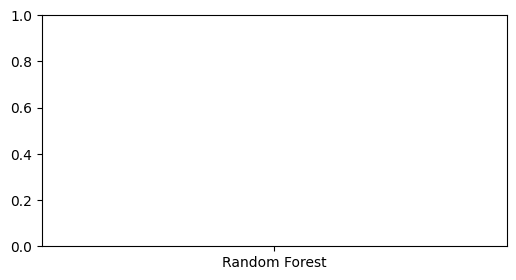

In [ ]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_logistic, accuracy_knn, accuracy_gb]
precisions = [precision_rf,  precision_logistic, precision_knn, precision_gb]

# Plotting accuracy
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting precision
plt.figure(figsize=(6, 3))
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

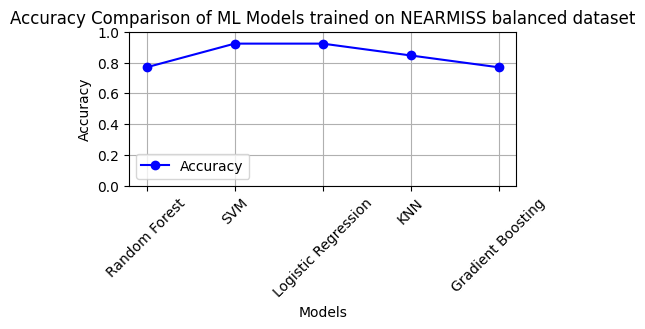

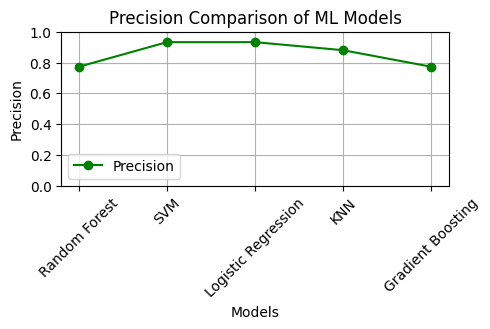

In [ ]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_svm, accuracy_logistic, accuracy_knn, accuracy_gb]
precisions = [precision_rf, precision_svm, precision_logistic, precision_knn, precision_gb]

# Plotting accuracy
plt.figure(figsize=(5, 2))
plt.plot(models, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy Comparison of ML Models trained on NEARMISS balanced dataset')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting precision
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='green', label='Precision')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()